# Audio Processing

Thanks to Colin Jemmott.

Today we will learn:

* How to make sounds with code
* How to manipulate those sounds with math
* How to play a short song!

# Make a sound file with a sine wave

In [1]:
%matplotlib inline

import matplotlib.pyplot as mpl
import numpy as np

In [6]:
samplingRate = 44100 # Hz
f = 440 # frequency of sine wave in Hz ("A" note)
t_max = 2 # seconds of recording length

N_max = int(t_max * samplingRate) # Number of samples

t = np.arange(N_max) / samplingRate  # time of each sample

wave = np.sin(2 * np.pi * f * t) # sine wave

Our sine wave is 

$\sin\left(2\pi ft\right)$

where

* $f$ is our frequency, and
* $t$ is the list of times, in seconds

### Plotting helps visualize the sound:
* x-axis: time (or sample #)
* y-axis: amplitude

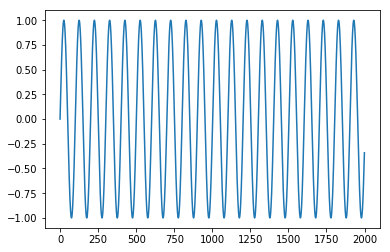

In [3]:
# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(wave[:2000])

### Scale the sine wave to fit the wav standard
* Be sure to keep the maximum (absolute) value of your wave to **at most** 32767
* *This is important, so you don't blow your speakers out!*

In [4]:
from scipy.io.wavfile import write

# we need to scale the sine wave so that it fits the wav standard

scaled_wave = np.int16(wave/np.max(np.abs(wave)) * 32767)

write('data/my_first_sin_wave.wav', samplingRate, scaled_wave)

Now download the file and listen to it.  Neat!

# Amplitude

What happens if you make the tone one tenth as large for every sample?  So our new sine wave would be

$\frac{1}{10} \sin\left(2\pi ft\right)$

(Plot the resulting wave, write it to file, and listen!)

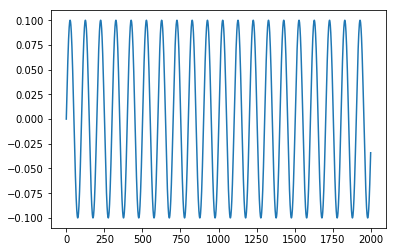

In [9]:
# your code here
amp_wave = (1/10)*wave

# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(amp_wave[:2000])
scaled_amp_wave = np.int16(amp_wave/np.max(np.abs(amp_wave)) * 32767)

write('data/amplitude_sin_wave.wav', samplingRate, scaled_amp_wave)

Next, what if you multiply it by a linear ramp, starting at 0 and ending at 1?

$A(t) \sin\left(2\pi ft\right)$

where the amplitude linearly changes from

$A(0) = 0$ to $A(t_{max}) = 1$

*Hint:* use `np.arange`.

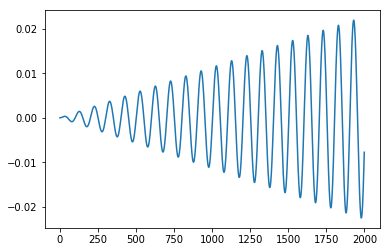

In [16]:
a = np.arange(0,1,(1/N_max))
linear_wave = a*wave

# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(linear_wave[:2000])
scaled_linear_wave = np.int16(linear_wave/np.max(np.abs(linear_wave)) * 32767)

write('data/linear_sin_wave.wav', samplingRate, scaled_linear_wave)


# Noise

Let's try a different signal.  Make a two second recording of random noise using
```
np.random.randn(N_max)
```
What does that sound like?
What if you add the random noise to your sine wave above?

Don't forget to scale it to wave standard!

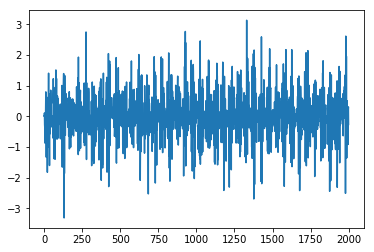

In [21]:
noise = np.random.randn(N_max)*wave
# Your code here
# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(noise[:2000])
scaled_noise = np.int16(noise/np.max(np.abs(noise)) * 32767)

write('data/noise.wav', samplingRate, scaled_noise)

# Adding Sounds

Since our random noise and sine wave, we can add them by adding together each element of the list.  As always, listen!  Does it sound like what you expected?

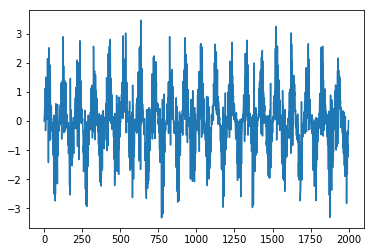

In [18]:
noisey_sin = noise + wave
# Your code here
# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(noisey_sin[:2000])
scaled_noisey = np.int16(noisey_sin/np.max(np.abs(noisey_sin)) * 32767)

write('data/noisey_sin.wav', samplingRate, scaled_noisey)

# Concatenating Sounds
Rather than adding each element of the noise and sine wave, instead make them into one list by concatenating them.

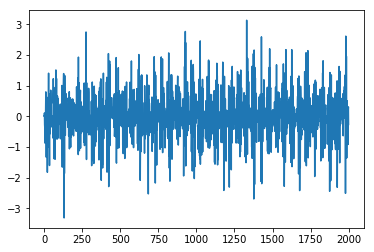

In [24]:
# Your code here
concat = np.concatenate((noise, wave))
# Your code here
# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(concat[:2000])
scaled_concat = np.int16(concat/np.max(np.abs(concat)) * 32767)

write('data/concat.wav', samplingRate, scaled_concat)

# Play a Song!

* How do you change notes (frequencies)?
* How do you put rests between the notes?
* Can you make the tempo 150 beats per minute?

In [45]:
e = 329 # Hz
d = 293 # Hz
c = 523 # Hz
g = 392
f = 349
a = 440 # frequency of sine wave in Hz ("A" note)
notes = [e, d, c, d, e, e, d]
length = [2, 2, 2, 2, 2, 2, 4]

In [39]:
# Your code here
samplingRate = 44100 # Hz
t_max = 2 # seconds of recording length

N_max = int(t_max * samplingRate) # Number of samples

t = np.arange(N_max) / samplingRate  # time of each sample
sample_length = [np.arange(int(num*samplingRate))/samplingRate for num in length]


song = []
for i in np.arange(len(notes)):
    song.append(np.sin(2 * np.pi * notes[i] * sample_length[i]))

# Your code here
my_song = np.concatenate(song)
# Your code here
# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(my_song[:2000])
scaled_song = np.int16(my_song/np.max(np.abs(my_song)) * 32767)

write('data/my_song.wav', samplingRate, scaled_song)

ValueError: operands could not be broadcast together with shapes (88200,) (44100,) 

In [52]:
rest = 0
mary = [a, g, f, g, a, a, a, rest, g, g, g,rest, a, c, c, a, g, f, g, a, a, a, a, g, g, a, g, f]
length = [.5]*28
length


[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

In [51]:
# Your code here
samplingRate = 44100 # Hz
t_max = 2 # seconds of recording length

N_max = int(t_max * samplingRate) # Number of samples

t = np.arange(N_max) / samplingRate  # time of each sample
sample_length = [np.arange(int(num*samplingRate))/samplingRate for num in length]

song = []
for i in np.arange(len(mary)):
    song.append(np.arange(1,0,-(1/(num*samplingRate)))* np.sin(2 * np.pi * mary[i] * sample_length[i]))

# Your code here
my_song = np.concatenate(song)
# Your code here
# The 'raw' sound wave -- pitch is finished, volume is not normalized yet
mpl.plot(my_song[:2000])
scaled_song = np.int16(my_song/np.max(np.abs(my_song)) * 32767)

write('data/mary.wav', samplingRate, scaled_song)

ValueError: operands could not be broadcast together with shapes (44100,) (22050,) 

# Playing with sound

### What happens if you apply functions to your sound vector?
* What happens if you invert it?  
* Make a maximum and minimum threshold?  
* Remove all the small numbers?  
* Can you make each note decay?

Wrap these in functions that you can apply to single notes that you can use to piece together a song.

### Audio signal processing is a big world!